<a href="https://colab.research.google.com/github/francji1/01PR/blob/main/R/Greg_Hamel_Intro_To_R/intro_to_r_part_22_probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to R Part 22: Probability Distributions

source:  https://www.kaggle.com/code/hamelg/intro-to-r-index/notebook


Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs.). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this lesson we'll discuss some common probability distributions and how to work with them in R.

# Distribution Function Basics and The Uniform Distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous) is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

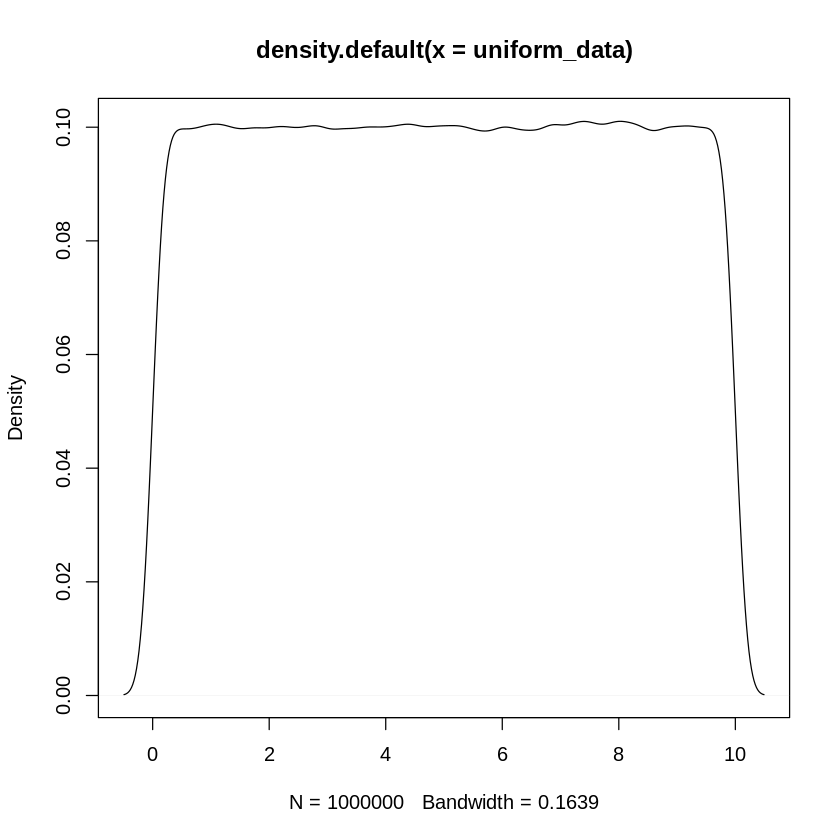

In [1]:
# Supress warnings
options(warn=-1)

# generate data from a uniform distribution
uniform_data <- runif(1000000,0,10)   

 # create a density plot
plot(density(uniform_data ))         

*Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations, thus it is not perfectly flat.*

In the code above, we generated 1 million data points from a uniform distribution spanning the range 0 to 10. In the density plot we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

Every probability distribution in R comes with 4 function prefixes: "r", "p" ,"q" and "d". When working probability distributions in R, your function calls will start with one of these four prefixes followed by a name for the type distribution you're working with. For instance, the R name for the uniform distribution is "unif" so the uniform distribution functions available to us are runif(), punif(), qunif() and dunif(). Let's go over each of these prefixes in detail.

The "r" prefix is used to generate random numbers from the specified distribution. As you may have noticed in previous lessons, we've used the runif() function many times generate random numbers. The arguments you supply when generating random numbers depend on the type of distribution you're using. In the case of the uniform, we have to specify how many random numbers we want to generate and then the range of the distribution.

In [ ]:
more_random_data <- runif(n=10000,   # Generate 10,000 numbers
                          min=0,     # In the range 0
                          max=10)    # To 10

The prefix "p" is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function).). In essence, "p" gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with punif().

In [ ]:
punif(q = 2.5,      # Cutoff value (quantile) to check
      min=0,                 
      max=10)

[1] 0.25

The prefix "q" is the inverse of the prefix "p": it returns the cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use q.

In [ ]:
qunif(p = 0.4,      # Probability cutoff
      min = 0, 
      max = 10)

[1] 4

Finally the "d" prefix gives you the density (height of the density curve) at a given point. Our plot of randomly generated uniform data was flat at 0.1 so the density of the distribution should be constant at 0.1 throughout the range 0 to 10.

In [ ]:
dunif(x = 0,           # x value at which to check density
      min = 0,
      max = 10)

dunif(5, 0, 10)        # Check some more densities
dunif(10, 0, 10)
dunif(11, 0, 10)    # a value outside the distribution's range has 0 probability

[1] 0.1

[1] 0.1

[1] 0.1

[1] 0

# Generating Random Numbers and Setting The Seed

Any time you need to generate random real numbers in a range with equal probability you can use the runif() function. The uniform distribution is continuous, meaning the values it generates can take on any real numbered value within the specified range, so the numbers it generates are decimals. If you need to generate integers instead of decimals, you could use floor() to round the decimals down.

In [ ]:
random_ints <- floor(runif(100000,1,11))    # Generate random data and round down

table(random_ints)                          # Check counts

random_ints
    1     2     3     4     5     6     7     8     9    10 
10050  9979 10010 10046 10123  9979 10063  9910  9845  9995 

Using runif() is not necessary to generate integers however: you can use the sample() function to draw a specified number of samples from a vector instead.

In [ ]:
random_ints2 <- sample(x = 1:10,             # Vector to sample from
                       size = 100000,        # Number of samples
                       replace = TRUE)       # Sample with replacement?*

table(random_ints2)                          # Check counts

random_ints2
    1     2     3     4     5     6     7     8     9    10 
10125 10140  9964 10089  9909  9936  9880  9919 10009 10029 

*Note: Sampling with replacement means you replace or "put back" a value after drawing it instead of removing it from the set you are sampling.*

When generating random data and working with functions that involve randomization, your results can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the seed with set.seed().

In [ ]:
set.seed(12)      # Set seed to arbitrary value

runif(5,1,5)    # Generate some random numbers

set.seed(12)      # Reset seed to the same value

runif(5,1,5)    # Generate more random numbers

[1] 1.277444 4.271101 4.770487 2.077528 1.677392

[1] 1.277444 4.271101 4.770487 2.077528 1.677392

Notice that we generated the exact same numbers with both calls to runif() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "[pseudorandom](https://en.wikipedia.org/wiki/Pseudorandomness)".

# The Normal Distribution

The normal or [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal. The R nickname for the normal distribution is "norm" so the functions for working with it are: rnorm(), pnorm(), qnorm() and dnorm().

In [ ]:
# Generate normally distributed data
normally_distributed <- rnorm(1000000,     
                              mean = 0,    
                              sd = 1)  

# Get prob of observing a value less than -1
prob_under_minus1 <- pnorm(q=-1,        
                     mean=0,
                     sd=1)

# Get prob of observing a value over 1
prob_over_1 <-  1-pnorm(q=1,            
                     mean=0,
                     sd=1)

# Prob between -1 and 1
between_prob <- 1-(prob_under_minus1+prob_over_1)  


prob_under_minus1
prob_over_1
between_prob

[1] 0.1586553

[1] 0.1586553

[1] 0.6826895

The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the randomly generated normal data and inspect the three areas we calculated under the density curve. 

*Note: Don't worry about the details of the plotting code, but notice we use ggplot2 isntead of R's base plotting, as it allows for more intricate plots.*

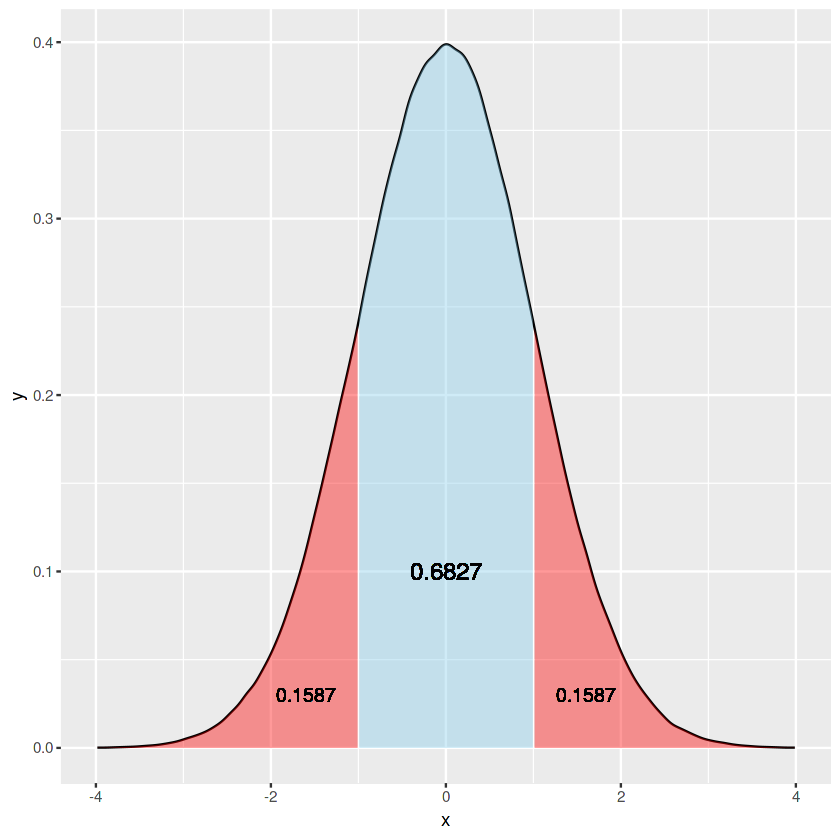

In [ ]:
library(ggplot2)

# Plot the density curve with the cutoff areas
norm_frame = with(density(normally_distributed),  # Create data frame density values
                  data.frame(x,y))  


myplot <- ggplot(data = norm_frame, aes(x = x, y = y)) +   # Create the plot
       geom_line() +
       geom_ribbon(data=subset(norm_frame,x < -1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > 1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > -1 & x < 1),
                   aes(ymax=y, ymin=0),
                   fill="skyblue", 
                   alpha=0.4) +
       geom_text(x=-1.6,y=0.03,label=round(prob_under_minus1,4),size=4) +
       geom_text(x=1.6,y=0.03,label=round(prob_under_minus1,4),size=4) +
       geom_text(x=0,y=0.1,label=round(1-(prob_under_minus1*2),4),size=5) +
       xlim(-4,4)

myplot

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.

Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check quantiles with qnorm().

In [ ]:
qnorm(p = 0.025)      # Find the quantile at the 2.5% cutoff
qnorm(p = 0.975)      # Find the quantile at the 97.5% cutoff

[1] -1.959964

[1] 1.959964

The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.

*Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution functions.*

# The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event with a known probability of success. The binomial is defined by two parameters: the probability of success in any given trial and the number of random trials. Each individual trial is known as a [Bernoulli random trail](https://en.wikipedia.org/wiki/Bernoulli_distribution). The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The R nickname for the binomial distribution is "binom", so the functions for working with it are rbinom(), pbinom(), qbinom() and dbinom(). Let's generate and investigate some binomial data.

fair_coin_flips
     0      1      2      3      4      5      6      7      8      9     10 
   973   9854  43736 117091 204867 246726 204975 117294  43723   9786    975 

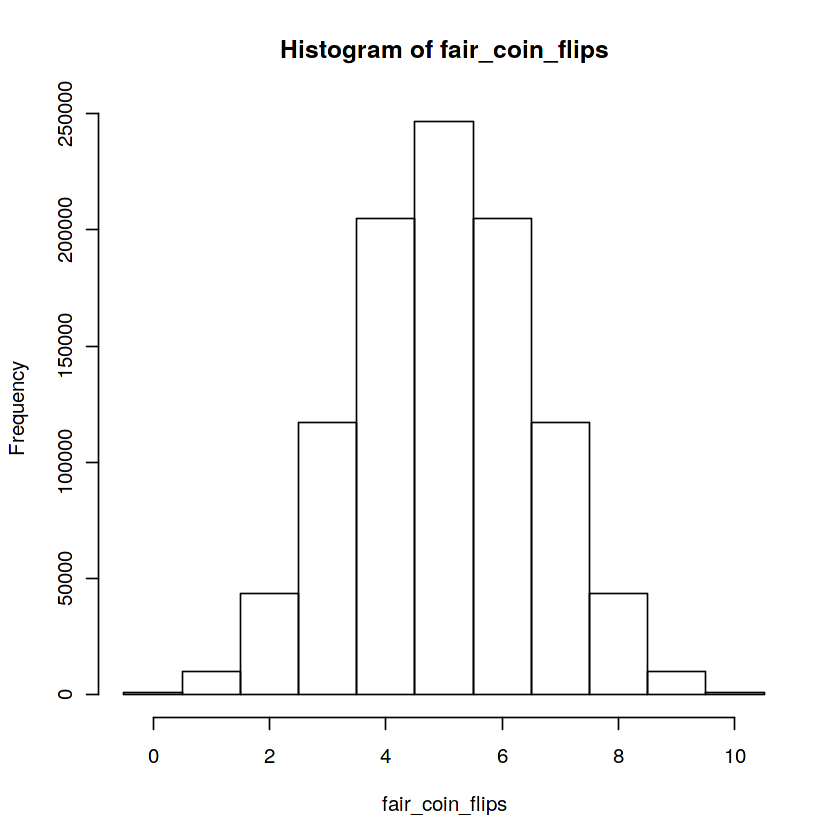

In [ ]:
fair_coin_flips   <- rbinom(1000000,    # Generate data from the binomial distribution
                           size = 10,   # With 10 trials
                           prob = 0.5)  # And success probability 0.5

table(fair_coin_flips)                # Check the counts

hist(fair_coin_flips, breaks=seq(-0.5,10.5,1))   # Plot the results as a histogram

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric.

biased_coin_flips
     1      2      3      4      5      6      7      8      9     10 
     1     60    756   5395  26336  88095 201120 302086 269178 106973 

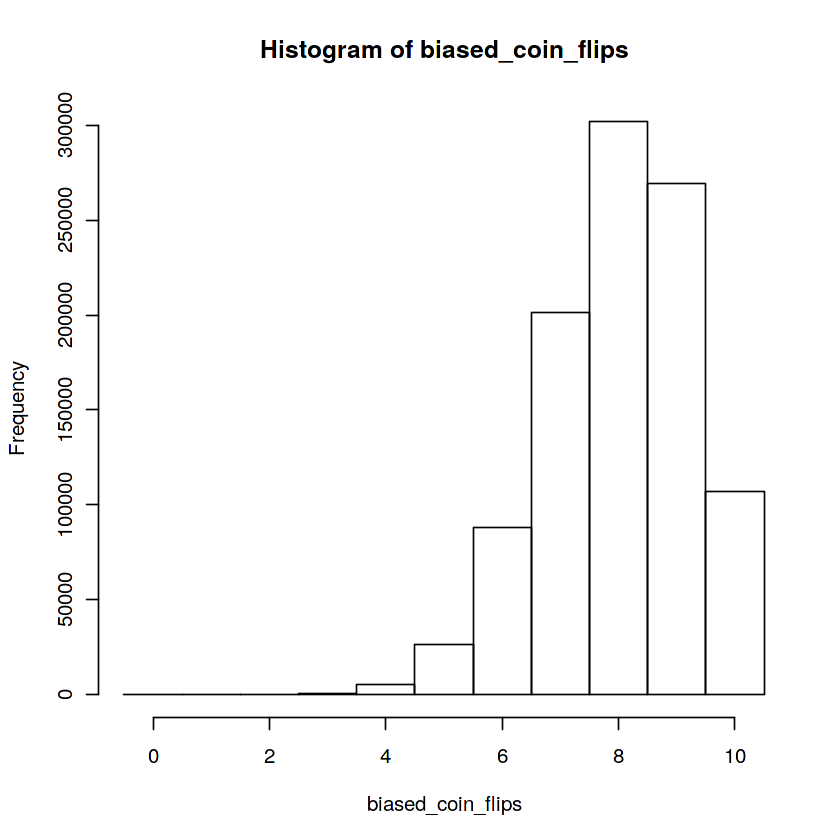

In [ ]:
set.seed(9)
biased_coin_flips   <- rbinom(1000000,  # Generate data from the binomial distribution
                           size = 10,   # With 10 trials
                           prob = 0.8)  # And success probability 0.8

table(biased_coin_flips)                # Check the counts

hist(biased_coin_flips, breaks=seq(-0.5,10.5,1))   # Plot the results as a histogram

The pbinom() function lets us check the probability of achieving a number of successes within a certain range.

In [ ]:
# Check the chances of achieving 5 successes or less
pbinom(q=5,           
      size=10,
      prob=0.8)

# Check the chances of achieving 9 successes or more
pbinom(q=8,           
      size=10,
      prob=0.8, 
      lower.tail = FALSE)    # Check the upper tail

[1] 0.0327935

[1] 0.3758096

dbinom() checks the density of the binomial at a given x value. Since the binomial is discrete, this is the probability of getting a specific number of successes.

In [ ]:
# Check the probability of 5 successes in 10 flips of a fair coin
dbinom(x=5,             
      size=10,
      prob=0.5)    

# Check the probability of 8 successes in 10 flips of a biased coin
dbinom(x=8,             
      size=10,
      prob=0.8)

[1] 0.2460938

[1] 0.3019899

# The Geometric and Exponential Distributions

The [geometric](https://en.wikipedia.org/wiki/Geometric_distribution) and [exponential](https://en.wikipedia.org/wiki/Exponential_distribution) distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The R name for the geometric distribution is "geom". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin.

flips_till_heads
     1      2      3      4      5      6      7      8      9     10     11 
500135 250046 125003  62229  31088  15649   7976   3869   2044    976    481 
    12     13     14     15     16     17     18     19     20     22     23 
   256    123     66     28     15      7      4      1      2      1      1 

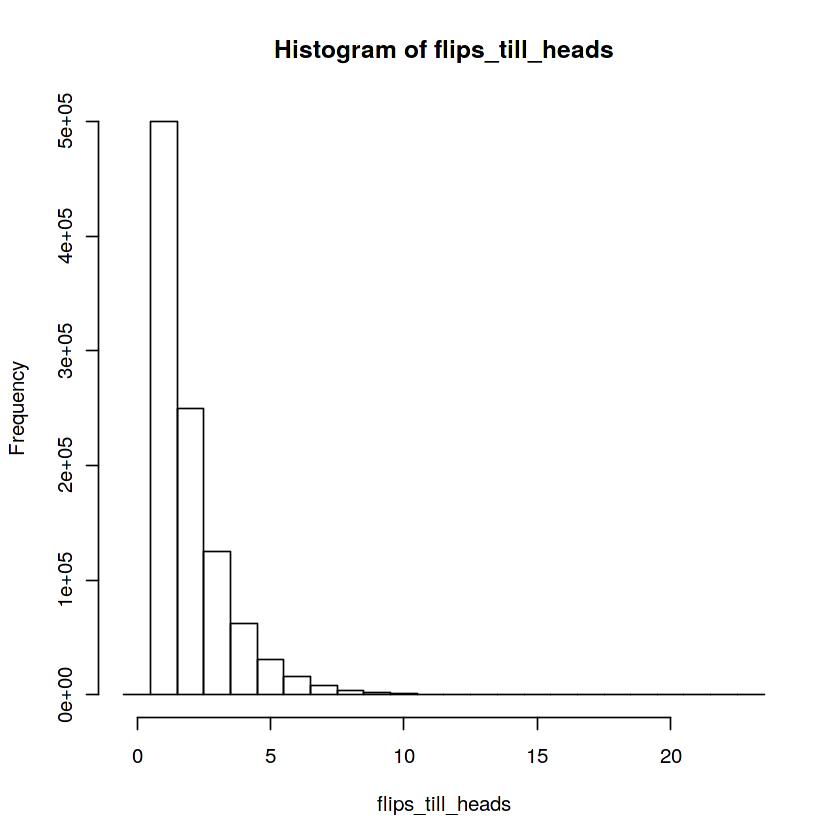

In [ ]:
set.seed(12)
flips_till_heads <- rgeom(n=1000000,     # Generate geometric data* 
                          prob=0.5) + 1    

table(flips_till_heads)     # Check counts of results

hist(flips_till_heads, 
     breaks=seq(-0.5,max(flips_till_heads)+0.5))   

*Note: in R the geom functions actually models the number of failures until the first success, so we need add 1 to get the number of trails until the first success.*

The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the million trails we generated, the longest it took to get a heads was 23 flips.

Let's use pgeom() to check the probability of needing 6 flips or more to get a success.

In [ ]:
pgeom(q=4,             
      prob=0.5, 
      lower.tail = FALSE)    # Check the upper tail

[1] 0.03125

You can use dgeom() to check the probability of seeing a specific number of failures before a success.

In [ ]:
# Check the chances of getting 1 failure and then a success
dgeom(x=1,
     prob=0.5)

[1] 0.25

The R name for the exponential distribution is "exp". We've already used the exponential function a few times in past lessons to generate skewed data with rexp(). Let's generate some exponential data, calculate the probability that we have to wait longer than 1 time unit for a success and plot it.

In [ ]:
exponential_data <- rexp(n=1000000,
                         rate=1)        # Success/arrival rate*

# Get the probability of waiting more than 1 time unit before a success
prob_longer_1 <- pexp(q=1,               
                      rate=1,
                      lower.tail=FALSE)

prob_longer_1

[1] 0.3678794

*Note: The average arrival time for the exponential distribution is equal to 1/rate.*

Let's plot a density curve of the exponential data we generated to see its shape.

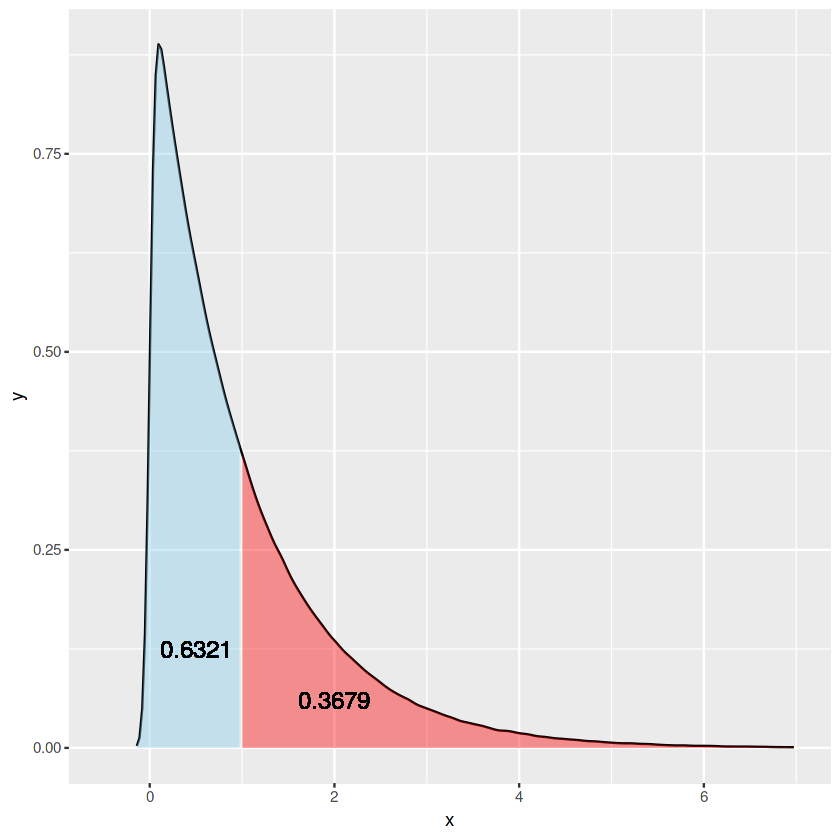

In [ ]:
# Plot the density curve of the exponential
exp_frame = with(density(exponential_data),  # Create data frame of x,y density values
                  data.frame(x,y))  

myplot <- ggplot(data = exp_frame, aes(x = x, y = y)) +   # Create the plot
       geom_line() +
       geom_ribbon(data=subset(exp_frame,x > 1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4)+
       geom_ribbon(data=subset(exp_frame,x < 1),
                   aes(ymax=y, ymin=0),
                   fill="skyblue", 
                   alpha=0.4) +
       geom_text(x=2,y=0.06,label=round(prob_longer_1,4), size=5) +
       geom_text(x=0.5,y=0.125,label=round(1-prob_longer_1,4), size=5) +
       xlim(-0.5,7)

myplot

Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

# The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The R shorthand for the Poisson distribution is "pois". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1.

arrival_rate_1
     0      1      2      3      4      5      6      7      8      9 
367994 367884 183697  61524  15193   3096    527     70     13      2 

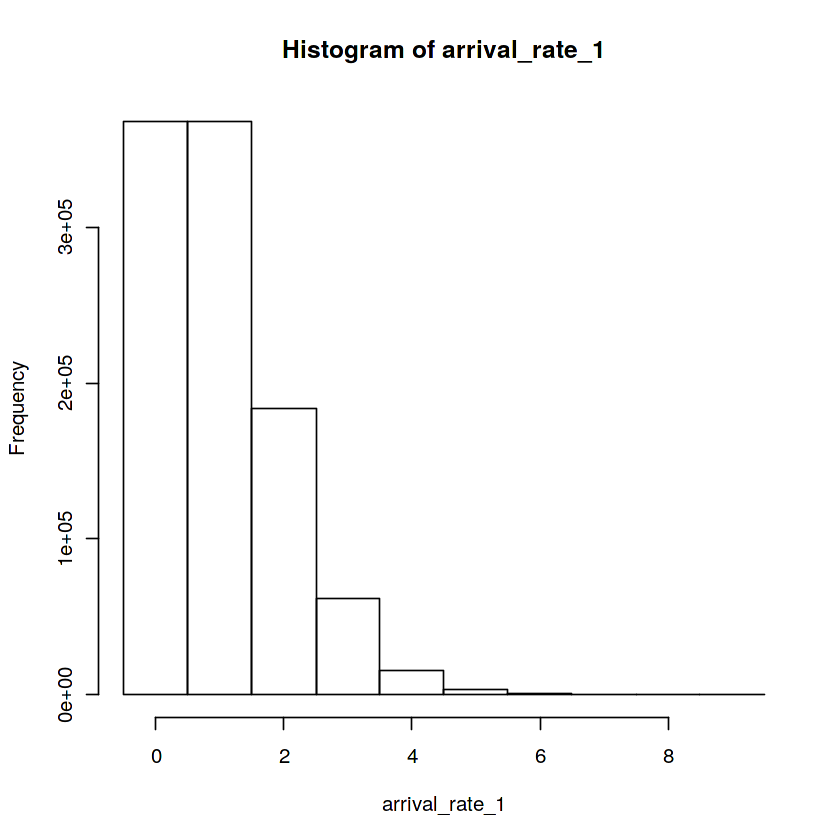

In [ ]:
set.seed(12)
arrival_rate_1 <- rpois(n = 1000000,
                      lambda = 1)        # Arrival rate

table(arrival_rate_1)

hist(arrival_rate_1,
     breaks=seq(-0.5,max(arrival_rate_1)+0.5,1))

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

arrival_rate_10
     0      1      2      3      4      5      6      7      8      9     10 
    49    473   2222   7576  18811  38135  62970  89986 112335 124749 125202 
    11     12     13     14     15     16     17     18     19     20     21 
114003  94613  72881  52293  34696  21709  12811   7147   3818   1952    874 
    22     23     24     25     26     27     28 
   400    175     65     30     12     10      3 

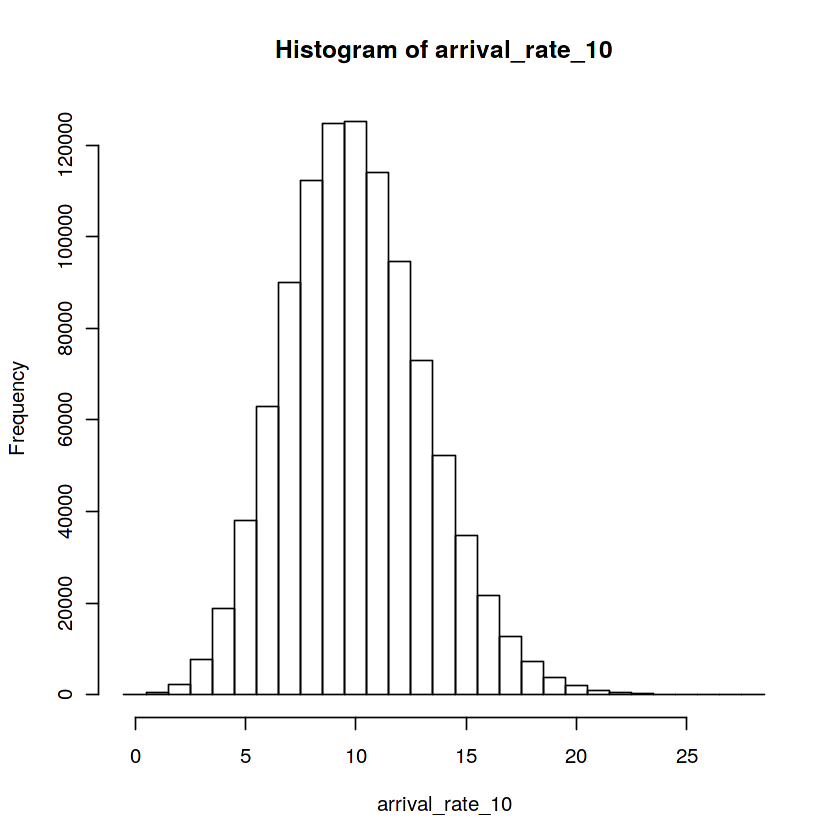

In [ ]:
set.seed(12)
arrival_rate_10 <- rpois(n=1000000,
                      lambda=10)    # Arrival rate of 10 per time unit

table(arrival_rate_10)

hist(arrival_rate_10,
     breaks=seq(-0.5,max(arrival_rate_10)+0.5,1))

We can use ppois() to check the probability of achieving more or less than a certain number of successes and dpos() to check the probability of obtaining a specific number of successes.

In [ ]:
# check the probability of getting 5 arrivals or less
ppois(q=5,           
      lambda=10)     

# Check the probability of getting exactly 10 arrivals
dpois(x=10,           
      lambda=10)

[1] 0.06708596

[1] 0.12511

# Wrap Up

R contains built in functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://en.wikibooks.org/wiki/R_Programming/Probability_Distributions) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.

In the next few lessons we'll build on the principles we've covered thus far and learn to carry out common statistical operations and tests in R.

# Next Lesson: [Intro to R Part 23: Confidence Intervals](https://www.kaggle.com/hamelg/intro-to-r-part-23-confidence-intervals)
[back to index](https://www.kaggle.com/hamelg/intro-to-r-index)

# Exercises

To do the exercises, fork this notebook and then fill in and run the code boxes according to the exercise instructions.

### Exercise #1
In the sport of basketball, shooters get to take uncontested shots called free throws when they are fouled by opposing players in certain circumstances. Great shooters can make upwards of 90% of their free throws. It is not uncommon for star players to take as many as 10 free throws in a game.

Use pbinom() to check the probability that a 90% free throw shooter makes exactly 9 or more free throws out of a sample of 10 trials. 

*Note that since we'd like to include 9 in the result, so we have to check for the probability of all outcomes above 8.*

In [ ]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #2
Even average shooters in the NBA achieve free throw rates around 75%, but over the course of long games and many trials, a few percentage points can add up. Check the probability that a 75% free throw shooter makes 9 or more free throws on 10 trials.

In [ ]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
From the previous exercise we discovered that even an average shooter makes 9 of 10 free throws or more about 25% of the time. This means in any given game, there's a decent chance that an average shooter will make free throws at a higher rate an elite shooter. But what about over the course of a season? Repeat exercise 1 and 2, but this time check the probability of making 90 or more free throws on 100 trials.

In [ ]:
"Your Code Here!"

[1] "Your Code Here!"

The results above show that while an average shooter may outperform a great shooter in any particular game, over the course of many games, the chances that an average shooter makes 90% of his free throws or more is practically zero.

## Exercise Solutions

In [ ]:
# 1 
set.seed(12)

pbinom(q = 8,
      size = 10,
      prob = 0.9,
      lower.tail=FALSE)


# 2 

pbinom(q = 8,
      size = 10,
      prob = 0.75,
      lower.tail=FALSE)

# 3

pbinom(q = 89,
      size = 100,
      prob = 0.9,
      lower.tail=FALSE)

pbinom(q = 89,
      size = 100,
      prob = 0.75,
      lower.tail=FALSE)

[1] 0.7360989

[1] 0.2440252

[1] 0.5831555

[1] 0.0001371006